In [1]:
%load_ext autoreload
%autoreload 2

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sys
sys.path.append("../../")
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val
from src.homps import homps
from src.hops import hops_trotter_simple
from src.hops import hops_rk_simple

In [3]:
# parameters for the bath correlation functions
g = np.array([2])
w = np.array([0.5+2j])
# time
duration = 50
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
h = operators.generate_spin_boson_hamiltonian()
L = sigma_z

Without noise:


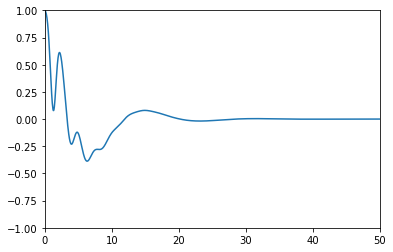

With noise:


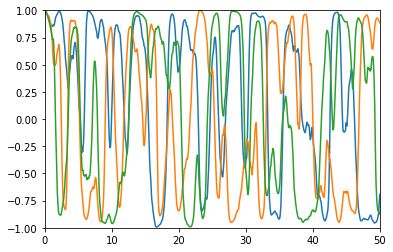

In [4]:
N_steps = 1000
N_trunc = 8

print("Without noise:")
hierarchy = homps.HOMPS_TDVP(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False)
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

print("With noise:")
hierarchy = homps.HOMPS_TDVP(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=True)
for i in range(3):
    psis = hierarchy.compute_realizations(1)
    sigma_zs = compute_exp_val(psis, sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

In [5]:
N_steps = 1000
N_trunc = 16

In [6]:
hierarchy = homps.HOMPS_TDVP(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=True)

In [7]:
psis_100 = hierarchy.compute_realizations(N_samples=100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
sigma_zs_100 = compute_exp_val(psis_100, sigma_z)

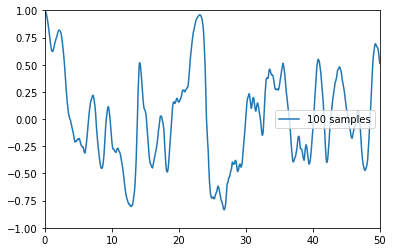

In [9]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_100, label="100 samples")
plt.legend(loc="right")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

This looks similar to the results we got from HOPS

# Fine-tuned comparison

In this section we want to reproduce the exact realization using HOMPS and HOPS

In [216]:
N_steps = 1000
N_trunc = 20
chimax = 10
epsilon = 0
N_krylov = 10

In [217]:
#hops = hops_rk_simple.HOPS_Simple_RK4(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=True)
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=True)
hierarchy = homps.HOMPS_TDVP(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=True, chimax=chimax, epsilon=epsilon, N_krylov=N_krylov)

In [218]:
zts = hops.generator.sample_process()

In [219]:
psis_hops = hops.compute_realizations(1, zts_debug=zts)
psis_homps = hierarchy.compute_realizations(1, zts_debug=zts)

In [220]:
sigma_zs_hops = compute_exp_val(psis_hops, sigma_z)
sigma_zs_homps = compute_exp_val(psis_homps, sigma_z)

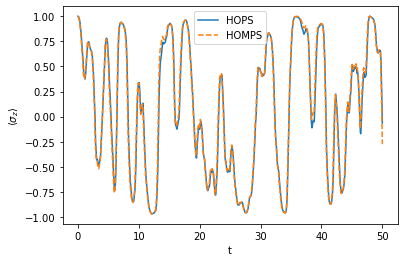

In [221]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_hops, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_homps, "--", label="HOMPS")
plt.ylabel(r"$\left\langle\sigma_z\right\rangle$")
plt.xlabel("t")
plt.legend()
plt.show()

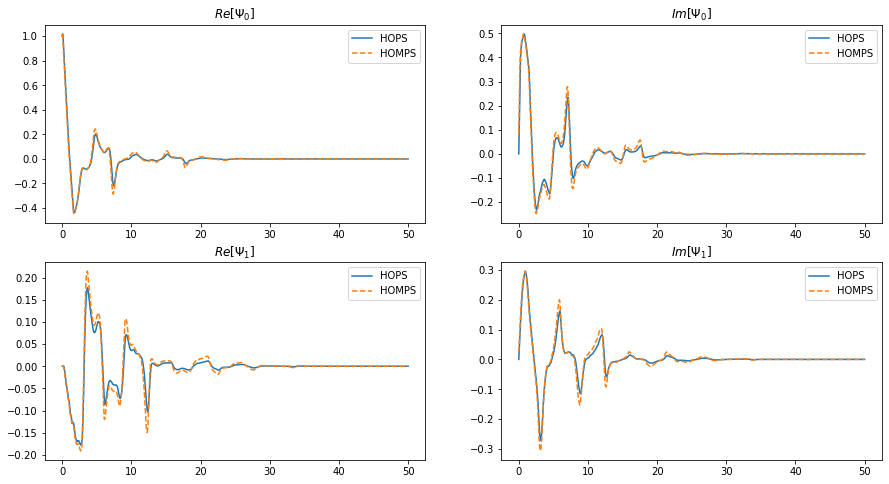

In [222]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))

axarray[0][0].plot(np.linspace(0, duration, N_steps), np.real(psis_hops[0, :, 0]), label="HOPS")
axarray[0][0].plot(np.linspace(0, duration, N_steps), np.real(psis_homps[0, :, 0]), "--", label="HOMPS")
axarray[0][0].legend()
axarray[0][0].set_title(r"$Re\left[\Psi_0\right]$")

axarray[0][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_hops[0, :, 0]), label="HOPS")
axarray[0][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_homps[0, :, 0]), "--", label="HOMPS")
axarray[0][1].legend()
axarray[0][1].set_title(r"$Im\left[\Psi_0\right]$")

axarray[1][0].plot(np.linspace(0, duration, N_steps), np.real(psis_hops[0, :, 1]), label="HOPS")
axarray[1][0].plot(np.linspace(0, duration, N_steps), np.real(psis_homps[0, :, 1]), "--", label="HOMPS")
axarray[1][0].legend()
axarray[1][0].set_title(r"$Re\left[\Psi_1\right]$")

axarray[1][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_hops[0, :, 1]), label="HOPS")
axarray[1][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_homps[0, :, 1]), "--", label="HOMPS")
axarray[1][1].legend()
axarray[1][1].set_title(r"$Im\left[\Psi_1\right]$")

plt.show()

/tmp/ipykernel_7694/2543188689.py:7: RuntimeWarning: divide by zero encountered in true_divide
  axarray[1].plot(np.linspace(0, duration, N_steps), np.abs(psis_hops[0, :, 1] - psis_homps[0, :, 1])/np.abs(psis_hops[0, :, 1]))


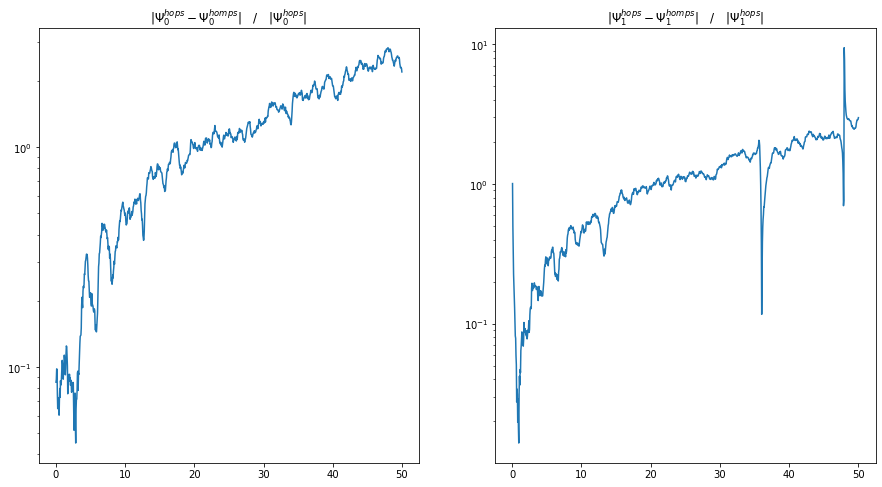

In [223]:
figure, axarray = plt.subplots(1, 2, figsize=(15, 8))

axarray[0].plot(np.linspace(0, duration, N_steps), np.abs(psis_hops[0, :, 0] - psis_homps[0, :, 0])/np.abs(psis_hops[0, :, 0]))
axarray[0].set_title(r"$\left|\Psi_0^{hops} - \Psi_0^{homps}\right|\quad/\quad\left|\Psi_0^{hops}\right|$")
axarray[0].set_yscale("log")

axarray[1].plot(np.linspace(0, duration, N_steps), np.abs(psis_hops[0, :, 1] - psis_homps[0, :, 1])/np.abs(psis_hops[0, :, 1]))
axarray[1].set_title(r"$\left|\Psi_1^{hops} - \Psi_1^{homps}\right|\quad/\quad\left|\Psi_1^{hops}\right|$")
axarray[1].set_yscale("log")

plt.show()

The realization was reproduced exactly!

# Looking at the MPO

In [173]:
N_steps = 1000
N_trunc = 30

In [174]:
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False)
hierarchy = homps.HOMPS_TDVP(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False)

In [175]:
#print(hops.Heff_linear.toarray())

In [176]:
W0 = hierarchy.model.H_mpo[0] # vL vR i i*
W1 = hierarchy.model.H_mpo[1] # vL vR j j*
left_contr = np.zeros(W0.shape[0])
left_contr[0] = 1.
right_contr = np.zeros(W1.shape[1])
right_contr[-1] = 1.
contr = np.tensordot(left_contr, W0, ([0], [0])) # -> vR i i*
contr = np.tensordot(contr, W1, ([0], [0])) # [vR] i i*; [vL] vR j j* -> i i* vR j j*
contr = np.tensordot(contr, right_contr, ([2], [0])) # -> i i* j j*
contr = np.transpose(contr, (2, 0, 3, 1)) # -> i j i* j*
contr = np.reshape(contr, (contr.shape[0]*contr.shape[1], contr.shape[2]*contr.shape[3]))

In [180]:
#print(contr)

In [181]:
print(np.all(hops.Heff_linear.toarray() == contr))

True


The MPO has the expected form.

# Performance analysis

In [8]:
def run_program():
    hierarchy = homps.HOMPS_TDVP(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=True)
    psis_100 = hierarchy.compute_realizations(N_samples=1)

In [11]:
import cProfile
import pstats

profile = cProfile.Profile()
profile.runcall(run_program)
ps = pstats.Stats(profile)

In [23]:
sortby = pstats.SortKey.CUMULATIVE
ps = pstats.Stats(profile).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

         2720265 function calls (2632259 primitive calls) in 5.298 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    5.298    5.298 /tmp/ipykernel_15619/2204382098.py:1(run_program)
        1    0.012    0.012    5.297    5.297 /home/benjamin/Documents/Uni/Informatik Bachelorarbeit/code/test/homps/../../src/homps/homps.py:70(compute_realizations)
     1000    0.008    0.000    5.171    0.005 /home/benjamin/Documents/Uni/Informatik Bachelorarbeit/code/test/homps/../../src/tdvp/tdvp.py:61(sweep)
     2000    0.046    0.000    5.163    0.003 /home/benjamin/Documents/Uni/Informatik Bachelorarbeit/code/test/homps/../../src/tdvp/tdvp.py:79(update_bond)
     2000    0.007    0.000    3.974    0.002 /home/benjamin/Documents/Uni/Informatik Bachelorarbeit/code/test/homps/../../src/tdvp/tdvp.py:252(evolve)
     2000    0.052    0.000    3.964    0.002 /home/benjamin/Documents/Uni/Informatik Bachelorarbei

NameError: name 's' is not defined

As expected, almost all time is spent in the expm_krylov and multiply methods.